In [1]:
import xarray as xr
import PyCO2SYS as pyco2
import numpy as np
from time import time
import gsw
import glob


from tqdm.contrib.concurrent import process_map 
import multiprocessing as mp
import os

In [2]:
datapath = '/lus/scratch/shao/data/NEP36_extremes/'
processed_datapath = f'{datapath}/processed'
prefix = 'NEP36-CanOE_1d_benthic_shelf_'

files = glob.glob(f'{datapath}/{prefix}*.nc')

x_slice = slice(215,713)
y_slice = slice(180,750)

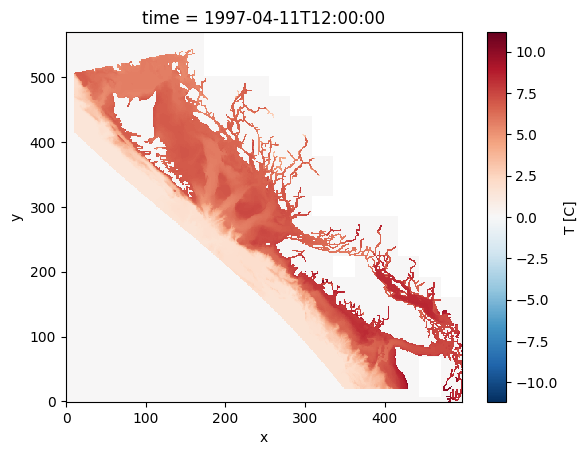

In [15]:
ds = xr.open_dataset('/lus/scratch/shao/data/NEP36_extremes/processed/daily/by_year/1997.nc')
ds.T[100,:,:].plot()

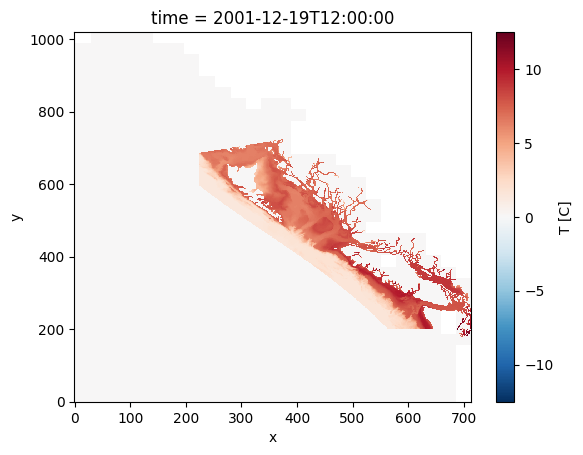

In [3]:
def calc_omega_a( alkalinity, dic ):
    results = pyco2.sys(
        par1 = alkalinity,
        par1_type = 1,
        par2 = dic,
        par2_type =2
    )
    return results['saturation_aragonite']

def calc_aou(ds):
    solubility = xr.apply_ufunc(
        gsw.O2sol_SP_pt,
        ds.S,
        ds.T,
        dask='parallelized'
    ) 
    return solubility - ds['O2']
    
def process_ds(file):
    ds = xr.open_dataset(file)
    x_slice = slice(215,713)
    y_slice = slice(180,750)
    ds = ds.isel(
            x = x_slice,
            y = y_slice
        )

        # Perform other calculations
    ds['OmegaA'] = xr.apply_ufunc(
        calc_omega_a,
        ds.ALK,
        ds.DIC,
        dask='parallelized'
    )
    ds['AOU'] = calc_aou(ds)
    ds.to_netcdf(f'{processed_datapath}/daily/{os.path.basename(file)}')

process_ds(files[0])

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


In [4]:
if __name__ == '__main__':
   r = process_map(process_ds, files, max_workers=128)

/tmp/ipykernel_83825/836476896.py:2: TqdmWarning: Iterable length 2660 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  r = process_map(process_ds, files, max_workers=128)


  0%|          | 0/2660 [00:00<?, ?it/s]

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)





Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;




/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC value

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC value

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC value

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.




/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



returning np.nan rather than negative DIC values.Some input pH values are impos

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC value

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC value

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC valu

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.




/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.




/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/pyt

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;




/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.




/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*a

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.



returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinit

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given th

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : la

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;



returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)




returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than n

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.




/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)




Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.


returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given 

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.


Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.
returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.

Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/lo

Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.

returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given t

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
Some input pH values are impossibly high given the input alkalinity;returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


Some input pH values are impossibly high given the input alkalinity;


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)



returning np.nan rather than negative DIC values.

/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)



Some input pH values are impossibly high given the input alkalinity;Some input pH values are impossibly high given the input alkalinity;

returning np.nan rather than negative DIC values.returning np.nan rather than negative DIC values.



/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/lus/bnchlu1/shao/local/pyenv/versions/analysis/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:78: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.
Some input pH values are impossibly high given the input alkalinity;
returning np.nan rather than negative DIC values.


In [7]:
# Subset the mask file
mask = xr.open_dataset(f'{datapath}/NEP36-mask_channel.nc')
mask_sub = mask.isel(
    x = x_slice,
    y = y_slice
)

mask_sub.to_netcdf(f'{processed_datapath}/static/mask.nc')

In [5]:
files = glob.glob(f'{processed_datapath}/daily/{prefix}*.nc')

In [6]:
files 
def concatenate_by_year(year):
    year_files = [file for file in files if str(year) in file]
    ds = xr.open_mfdataset(year_files, parallel=True, engine='h5netcdf')
    ds.to_netcdf(f'{processed_datapath}/daily/by_year/{year}.nc')


# Group daily into annual files
years = range(1996,2004)
if __name__ == '__main__':
   r = process_map(concatenate_by_year, years, max_workers=128)



  0%|          | 0/8 [00:00<?, ?it/s]

ValueError: Invalid location identifier (invalid identifier type to function)